# Building A Virtual World

In [143]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import mpl_toolkits.mplot3d as plt3d
import itertools

In [144]:
#Adding points into the virtual world
def create_points():
    points_map = {}
    points_list = list(itertools.permutations([-0.5,-0.5,-0.5,0,0,0,0.5,0.5,0.5], 3))
    new_points_list = []
    for each in points_list:
        if each in points_map:
            continue
        else:
            points_map[each] = 1
            new_points_list.append([each[0], each[1], each[2]]) 
    return np.array(new_points_list)

In [213]:
def color_list():
    color_list = ['Red', 'Red', 'Red', 'Green', 'Green', 'Green', 'Blue', 'Blue', 'Blue', 'Orange', 'Orange', 'Orange', 'Yellow', 'Yellow', 'Yellow', 'Purple', 'Purple', 'Purple', 'Pink', 'Pink', 'Pink', 'Black', 'Black', 'Black', 'Brown', 'Brown', 'Brown']
    return color_list

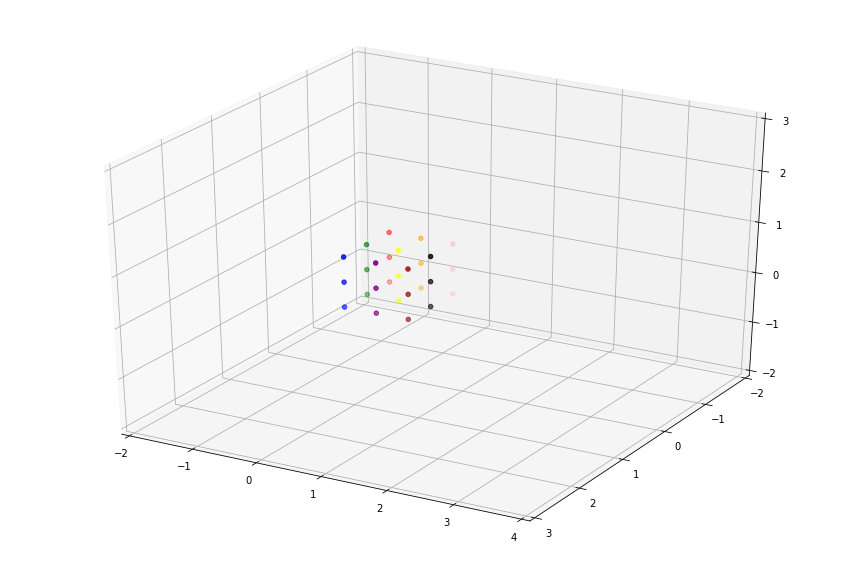

In [214]:
#Showing the points in the 3D world
fig = plt.figure(figsize=(15,10))
points = create_points()
ax = fig.add_subplot(111, projection='3d')
colors = color_list()
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color = colors)
ax.set_xlim([-2,4])
ax.set_ylim([3,-2])
ax.set_zlim([-2,3])
plt.show()

In [215]:
def preset_cams():
    r = 5
    focal_length = 0.06
    width = 256
    height = 256
    alpha = np.pi/6
    beta = np.pi/6
    
    cam1 = { 'position': [r * np.cos(beta) * np.cos(alpha), r * np.cos(beta) * np.sin(alpha), r * np.sin(beta)],
           'target':[0,0,0],
           'up':[0,0,1],
           'focal_length':focal_length,
           'film_width':0.035,
           'film_height':0.035,
           'width':width,
           'height':height,
           }
    
    alpha = np.pi/3
    beta = np.pi/6
    
    cam2 = { 'position': [r * np.cos(beta) * np.cos(alpha), r * np.cos(beta) * np.sin(alpha), r * np.sin(beta)],
           'target':[0,0,0],
           'up':[0,0,1],
           'focal_length':focal_length,
           'film_width':0.035,
           'film_height':0.035,
           'width':width,
           'height':height,
           }
    
    return cam1, cam2

In [216]:
def camera_coordinate_system(cam):
    zcam = np.array(cam['target']) - np.array(cam['position'])
    xcam = np.cross(zcam, cam['up'])
    ycam = np.cross(zcam, xcam)
    
    zcam = zcam / np.linalg.norm(zcam)
    xcam = xcam / np.linalg.norm(xcam)
    ycam = ycam / np.linalg.norm(ycam)
    
    origin = cam['position']
    return xcam, ycam, zcam, origin

In [217]:
def add_line(P1, P2, c):
    xs = [P1[0], P2[0]]
    ys = [P1[1], P2[1]]
    zs = [P1[2], P2[2]]
    line = plt3d.art3d.Line3D(xs, ys, zs, color=c)
    return line

In [227]:
def plot_camera(cam, c):
    xcam, ycam, zcam, origin = camera_coordinate_system(cam)
    d = np.array(cam['target']) - np.array(cam['position'])
    d = np.linalg.norm(d)
    x = 0.5 * cam['film_width'] * d / cam['focal_length']
    y = 0.5 * cam['film_height'] * d / cam['focal_length']
    P1 = origin + x * xcam + y * ycam + d * zcam
    P2 = origin + x * xcam - y * ycam + d * zcam
    P3 = origin - x * xcam - y * ycam + d * zcam
    P4 = origin - x * xcam + y * ycam + d * zcam
    points = create_points()
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c = colors)
    
    line1 = add_line(P1, P2, c)
    line2 = add_line(P2, P3, c)
    line3 = add_line(P3, P4, c)
    line4 = add_line(P4, P1, c)
    line5 = add_line(P1, P3, c)
    line6 = add_line(P2, P4, c)
    
    ax.add_line(line1)
    ax.add_line(line2)
    ax.add_line(line3)
    ax.add_line(line4)
    ax.add_line(line5)
    ax.add_line(line6)
    ax.set_xlim([-2,3])
    ax.set_ylim([4,-2])
    ax.set_zlim([-2,3])
    plt.show()
    

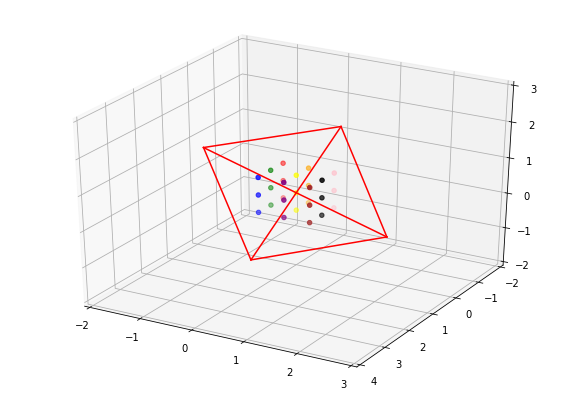

In [229]:
cam1, cam2 = preset_cams()
plot_camera(cam1, 'r')

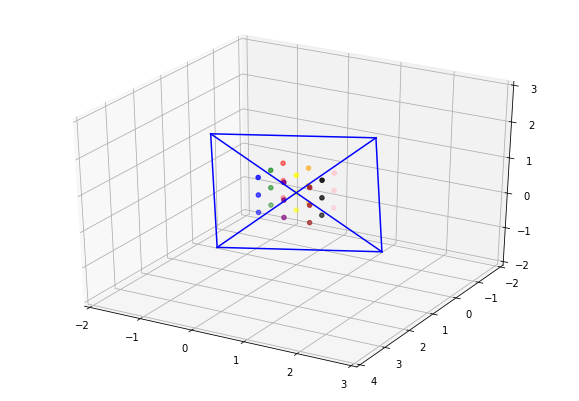

In [230]:
plot_camera(cam2, 'b')

In [231]:
#Virtual World
def virtual_world(cam, ax, c):
    xcam, ycam, zcam, origin = camera_coordinate_system(cam)
    d = np.array(cam['target']) - np.array(cam['position'])
    d = np.linalg.norm(d)
    x = 0.5 * cam['film_width'] * d / cam['focal_length']
    y = 0.5 * cam['film_height'] * d / cam['focal_length']
    P1 = origin + x * xcam + y * ycam + d * zcam
    P2 = origin + x * xcam - y * ycam + d * zcam
    P3 = origin - x * xcam - y * ycam + d * zcam
    P4 = origin - x * xcam + y * ycam + d * zcam
    
    line1 = add_line(P1, P2, c)
    line2 = add_line(P2, P3, c)
    line3 = add_line(P3, P4, c)
    line4 = add_line(P4, P1, c)
    
    line7 = add_line(np.array(cam['position']), P1, c)
    line8 = add_line(np.array(cam['position']), P2, c)
    line9 = add_line(np.array(cam['position']), P3, c)
    line10 = add_line(np.array(cam['position']), P4, c)
    
    ax.add_line(line1)
    ax.add_line(line2)
    ax.add_line(line3)
    ax.add_line(line4)
    ax.add_line(line7)
    ax.add_line(line8)
    ax.add_line(line9)
    ax.add_line(line10)
    ax.set_xlim([4,-2])
    ax.set_ylim([-2,4])
    ax.set_zlim([-2,3])
    
    return ax

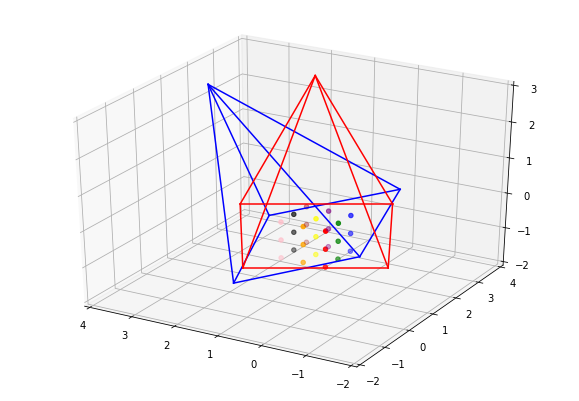

In [232]:
points = create_points()
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c = colors)
ax = virtual_world(cam1, ax, 'b')
ax = virtual_world(cam2, ax, 'r')
plt.show()

Adding a third camera as an extension - 

In [242]:
def third_camera():
    r = 5
    focal_length = 0.06
    width = 256
    height = 256
    alpha = np.pi/3
    beta = np.pi/3
    
    cam3 = { 'position': [r * np.cos(beta) * np.cos(alpha), r * np.cos(beta) * np.sin(alpha), r * np.sin(beta)],
           'target':[0,0,0],
           'up':[0,0,1],
           'focal_length':focal_length,
           'film_width':0.035,
           'film_height':0.035,
           'width':width,
           'height':height,
           }
    return cam3

In [256]:
cam3 = third_camera()

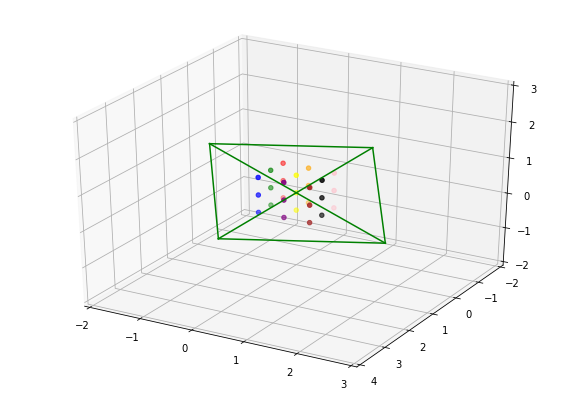

In [257]:
plot_camera(cam3, 'g')

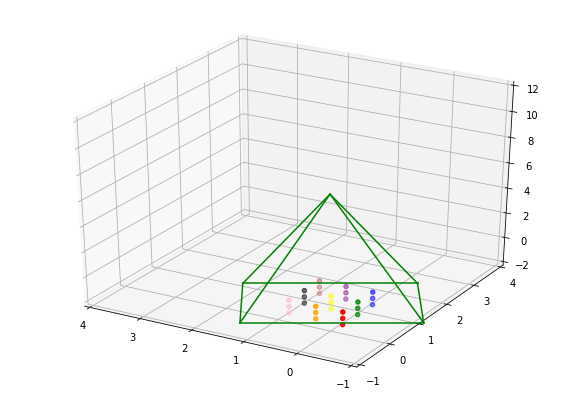

In [258]:
points = create_points()
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c = colors)
#ax = virtual_world(cam1, ax, 'b')
#ax = virtual_world(cam2, ax, 'r')
ax = virtual_world(cam3, ax, 'g')
ax.set_xlim([4,-1])
ax.set_ylim([-1,4])
ax.set_zlim([-2,12])
plt.show()